In [36]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
from qiskit.providers.aer import QasmSimulator

In [38]:
num_qubits = 8

alice_basis = np.random.randint(2, size=num_qubits)
alice_state = np.random.randint(2, size=num_qubits)
bob_basis = np.random.randint(2, size=num_qubits)

print(f"Alice's State:\t {np.array2string(alice_state)}")
print(f"Alice's Bases:\t {np.array2string(alice_basis)}")
print(f"Bob's Bases:\t {np.array2string(bob_basis)}")

Alice's State:	 [0 0 1 1 1 1 1 1]
Alice's Bases:	 [1 0 1 1 1 1 1 0]
Bob's Bases:	 [1 0 0 1 0 0 0 1]


In [ ]:
def alice_side(random):
    if random ==True:
        
    

In [73]:
def bb84_circuit(state, basis, measurement_basis):
    '''
    #state: array of 0s and 1s denoting the state to be encoded
    #basis: array of 0s and 1s denoting the basis to be used for encoding
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    #meas_basis: array of 0s and 1s denoting the basis to be used for measurement
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    '''
    num_qubits = len(state)
    
    circuit = QuantumCircuit(num_qubits)

    # Sender prepares qubits
    for i in range(len(basis)):
        if state[i] == 1:
            circuit.x(i)
        if basis[i] == 1:
            circuit.h(i)
   

    # Measuring action performed by Bob
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            circuit.h(i)

    circuit.measure_all()
    
    return circuit

In [74]:
print(alice_state)

[0 0 1 1 1 1 1 1]


In [75]:
print(alice_basis)

[1 0 1 1 1 1 1 0]


In [76]:
print(bob_basis)

[1 0 0 1 0 0 0 1]


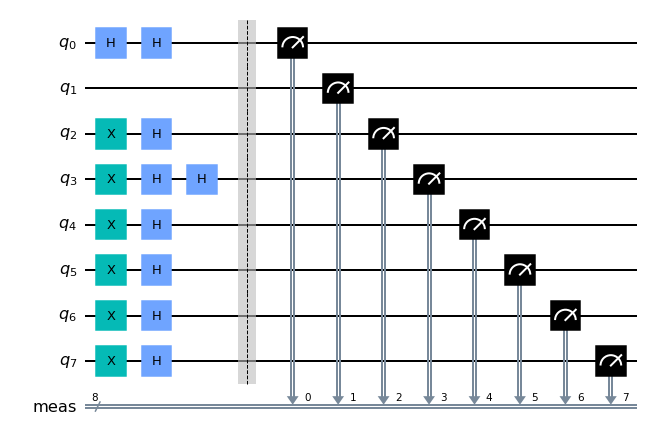

In [77]:
circuit = bb84_circuit(alice_state, alice_basis, bob_basis)
circuit.draw('mpl')

In [105]:
circuit = bb84_circuit(alice_state, alice_basis, bob_basis)
key = execute(circuit,backend=QasmSimulator(),shots=1).result().get_counts().most_frequent()
encryption_key = ''
print(key)
for i in range(num_qubits):
    if alice_basis[i] == bob_basis[i]:
        encryption_key += str(key[num_qubits -1-i])
    else:
        encryption_key += str(0)
        
print(f"Key: {encryption_key}")

11001000
Key: 00010000
